# MSDS 430 Milestone 2

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this second milestone we will continue working toward the final project for this course. By now you should have a very clear picture of your plans for the final project, so these steps will simply walk you through some of the work.  </font>

Step 1 (5 pts.): In Milestone 1, you gave a brief summary of your overall plans for the final project. What has changed since then? Has your problem changed? Did you choose a different data set? Why or why not? What additional detail can you provide with regard to your goals for the final project?

#### What has changed?

To better showcase what we have learned in this course, we are focusing primarily on three columns of the wine quality file. In doing so, we can show the proper method to select only specific columns for further analysis. In addition, we have modified the wine quality file to include NAN values, which will subsequently be removed via a fuction we have called cleanFile.

##### Goal of overall project: 

Quality of wine can be defined differently depending on who is asked. We have captured 1599 wines and various chemical properties of those wines along with a quality rating (1-10). We will focus on two chemical characteristics - residual sugar and alcohol content to discern which has a greater impact on the overall quality of the wine. 

As we look towards the final project, we will continue to iterate on this code to achieve better organiztion using class and static methods. 



Step 2 (5 pts.): Read in your data file and use pandas and clean up your data as needed. Extract only what you will be using for this project and demonstrate this by creating a nicely formatted table of the first 20 rows of data relevant to your needs for the project. Each column should align nicely and be clearly labeled. Remember to include any relevant comments within your code.

In [6]:
# Import the necessary libraries
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import statsmodels.api as sm
import sklearn 

In [7]:
def cleanFile(filename):
    """Reads and cleans file with alcohol, residual_sugar, and quality of wine into a dataframe"""
    headers = ['alcohol', 'residual_sugar', 'quality']
    df = pd.read_csv(filename, skipinitialspace=True, usecols=headers)
    initCount = df['alcohol'].count()
    df = df.dropna(axis = 0, how = 'any')
    df.to_csv('cleanfile.csv', sep=',', columns=headers, index=False)
    
    endCount = df['alcohol'].count()
    count = initCount - endCount
    
    print('File Clean - {} records were removed'.format(count))
    print('\n', df.head(20))




In [8]:
cleanFile('winequality-red.csv')

File Clean - 9 records were removed

     residual_sugar  alcohol  quality
0              1.9      9.4      5.0
1              2.6      9.8      5.0
3              1.9      9.8      6.0
4              1.9      9.4      5.0
5              1.8      9.4      5.0
6              1.6      9.4      5.0
7              1.2     10.0      7.0
8              2.0      9.5      7.0
9              6.1     10.5      5.0
10             1.8      9.2      5.0
11             6.1     10.5      5.0
13             1.6      9.1      5.0
14             3.8      9.2      5.0
15             3.9      9.2      5.0
16             1.8     10.5      7.0
17             1.7      9.3      5.0
18             4.4      9.0      4.0
19             1.8      9.2      6.0
20             1.8      9.4      6.0
21             2.3      9.7      5.0


Step 3 (5 pts.): Use numpy and the cleaned data to perform several calculations relevant to your final project. Explain each calculation by including comments within your code. Your output should clearly state what each calculation is, i.e. "The mean height of those in the data is X"

In [9]:
def analyzeFile(filename):
    """Reads and provides statistical analysis on file containing alcohol, residual_sugar, and quality of wine""" 
    df = pd.read_csv(filename)
    
    recordCount = df['alcohol'].count()
    
    meanAlcohol = round(np.mean([df.alcohol]), 3)
    meanResidualSugar = round(np.mean([df.residual_sugar]), 3)
    meanQuality = round(np.mean([df.quality]), 3)
    
    stdAlcohol = round(np.std([df.alcohol]), 3)
    stdResidualSugar = round(np.std([df.residual_sugar]), 3)
    stdQuality = round(np.std([df.quality]), 3)
    
    correlations = round(df.corr()['quality'].drop('quality'), 4)
    
    print('This file contain \033[1m{}\033[0m wines'.format(recordCount))
    print('\nThe average \033[1malcohol\033[0m content is \033[1m{}\033[0m with a standard deviation of \033[1m{}\033[0m'.format(meanAlcohol, stdAlcohol))
    print('\nThe average \033[1mresidual sugar\033[0m content is \033[1m{}\033[0m with a standard deviation of \033[1m{}\033[0m'.format(meanResidualSugar, stdResidualSugar))
    print('\nThe average \033[1mqualilty\033[0m is \033[1m{}\033[0m with a standard deviation of \033[1m{}\033[0m'.format(meanQuality, stdQuality))
    print("\nCorrelations between independent variables \033[1m'Alcohol'\033[0m and \033[1m'Residual Sugar'\033[0m and dependent variable \033[1m'Quality'\033[0m:")
    print('\n\033[1m{}\033[0m'.format(correlations))


In [10]:
analyzeFile('cleanfile.csv')

This file contain 1584 wines

The average alcohol content is 10.424 with a standard deviation of 1.063

The average residual sugar content is 2.54 with a standard deviation of 1.414

The average qualilty is 5.64 with a standard deviation of 0.808

Correlations between independent variables 'Alcohol' and 'Residual Sugar' and dependent variable 'Quality':

alcohol           0.4764
residual_sugar    0.0129
Name: quality, dtype: float64


Step 4 (5 pts.): Use matplotlib to create at least two visual displays relevant to your final project. Explain your graphs by including comments within your code. Your displays should be labeled clearly and appropriately scaled.

In [120]:
def visualizeFile(filename):
    """Reads and provides visual analysis on a file containing alcohol, residual sugar, and quality of wine""" 
    #Heatmap of correlations between each attribute and quality 
    df = pd.read_csv(filename)    
    sns.heatmap(df.corr())
    print('Heatmap')
    plt.show()

    
    #Boxplot grouped by quality, show distribution of alcohol
    dims = (10, 5)
    fig, ax = plt.subplots(figsize = dims,)
    sns.boxplot(x='quality', y='alcohol', data=df)
    ax.set_title('Distribution of alcohol content in Red Wine')
    sns.swarmplot(x="quality", y="alcohol", data=df,
              size=2, color=".3", linewidth=0)
    print('Boxplot')
    plt.show()
    

    dims = (10, 5)
    fig, ax = plt.subplots(figsize = dims,)
    plt.scatter(x='residual_sugar', y='alcohol', data=df)
    ax.set_title('Correlation of Residual Sugar and Quality in Red Wine')
    ax.set_xlabel('Residual Sugar')
    ax.set_ylabel('Alcohol')
    print('Scatter Plot')
    plt.show()

Heatmap


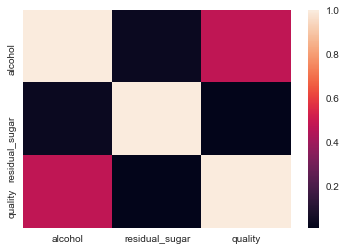

Boxplot


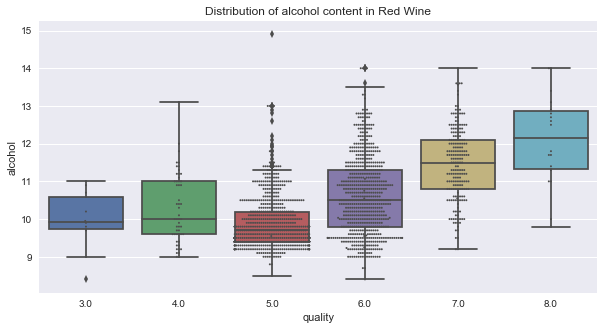

Scatter Plot


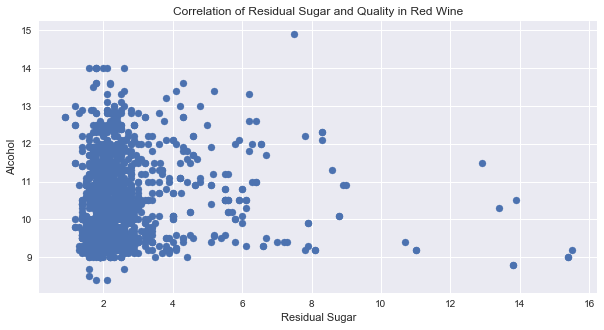

In [121]:
visualizeFile('cleanfile.csv')